In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

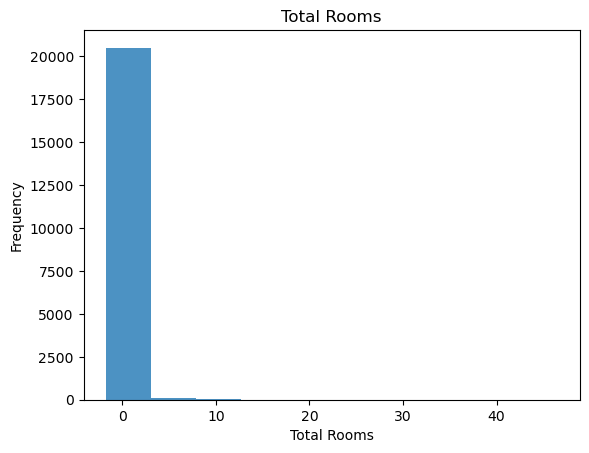

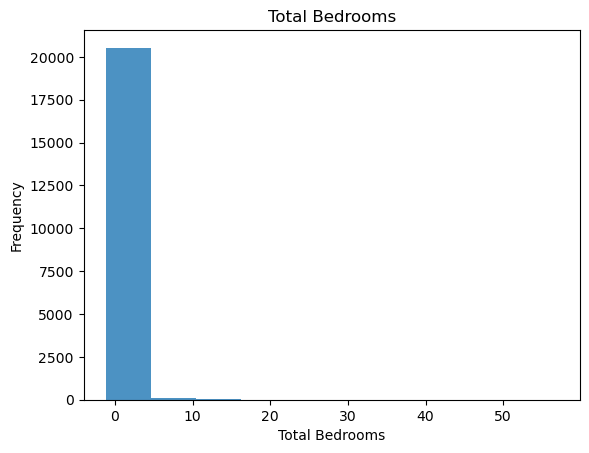

In [71]:

file="/Users/marieqi/Downloads/housingUnits.csv"
data=pd.read_csv(file)
data["total_rooms"]=data['total_rooms']/data['population']
data['total_bedrooms']=data['total_bedrooms']/data['population']
scaler=StandardScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns=data.columns)
plt.hist(data["total_rooms"],alpha=.8)
plt.xlabel('Total Rooms')
plt.ylabel("Frequency")
plt.title('Total Rooms')
plt.show()
plt.hist(data["total_bedrooms"],alpha=.8)
plt.xlabel('Total Bedrooms')
plt.ylabel("Frequency")
plt.title('Total Bedrooms')
plt.show()


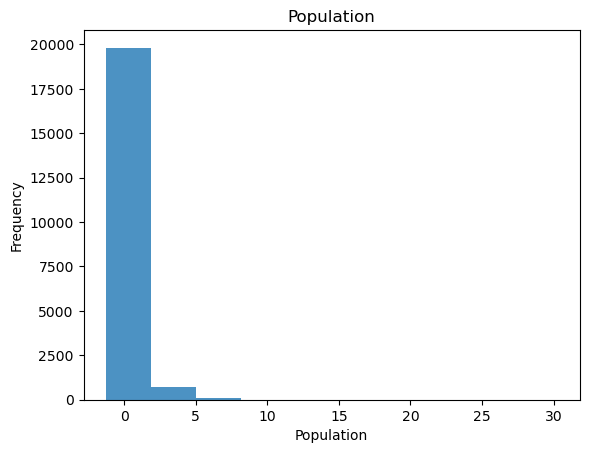

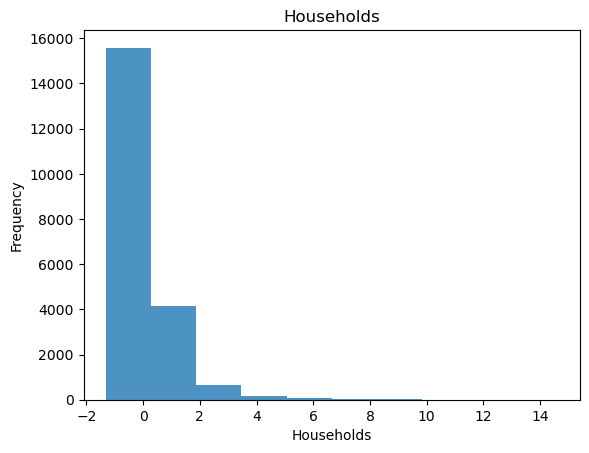

In [70]:
plt.hist(data["population"],alpha=.8)
plt.xlabel('Population')
plt.ylabel("Frequency")
plt.title('Population')
plt.show()
plt.hist(data["households"],alpha=.8)
plt.xlabel('Households')
plt.ylabel("Frequency")
plt.title('Households')
plt.show()

Column: housing_median_age
Intercept: 0.003193993465727218
Coefficient: [0.10377065]
RMSE: 0.9857843677223443
R2: 0.0125512355333115


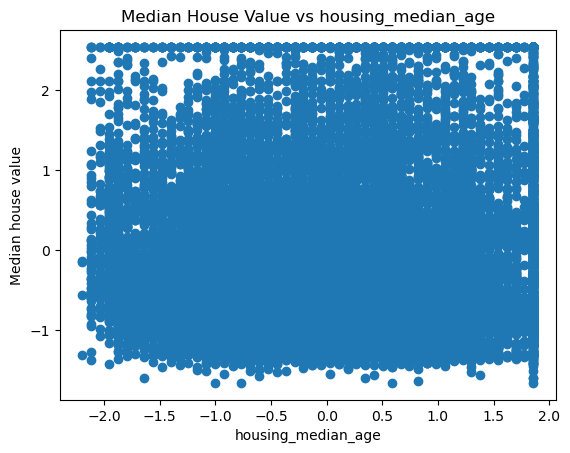

Column: total_rooms
Intercept: 0.0022521056122000284
Coefficient: [0.2171619]
RMSE: 0.973265112408784
R2: 0.03747276077554229


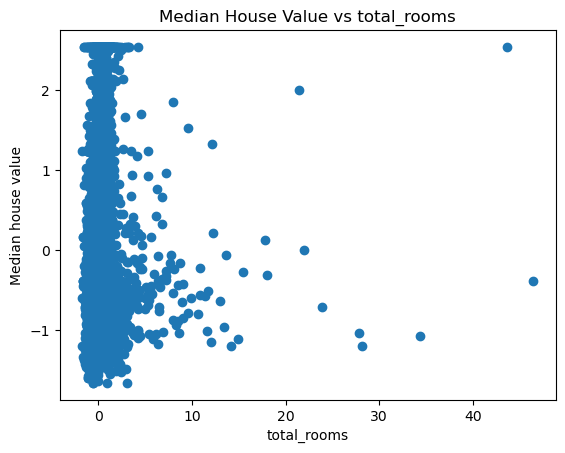

Column: total_bedrooms
Intercept: 0.0029339416518150787
Coefficient: [0.11633288]
RMSE: 0.9868091567955103
R2: 0.010497129746728562


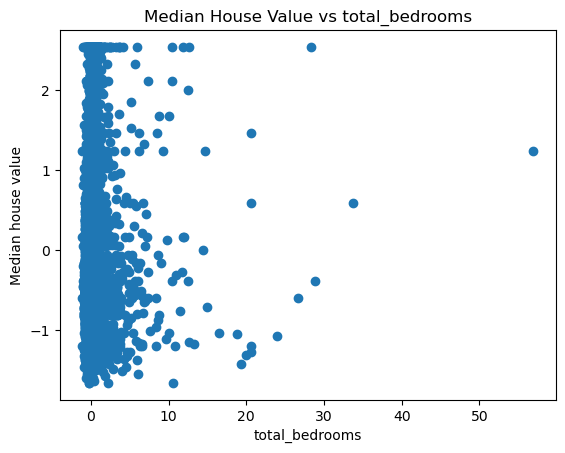

Column: population
Intercept: 0.0029591192190128192
Coefficient: [-0.02597821]
RMSE: 0.9919834778627212
R2: 9.303316180342414e-05


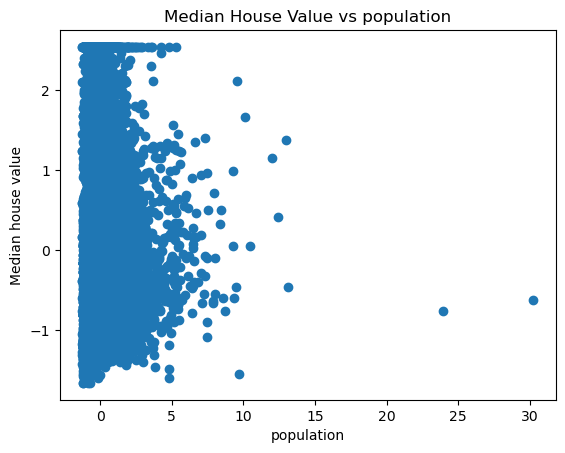

Column: households
Intercept: 0.002861776929407633
Coefficient: [0.06406803]
RMSE: 0.989432960739147
R2: 0.005228201940277177


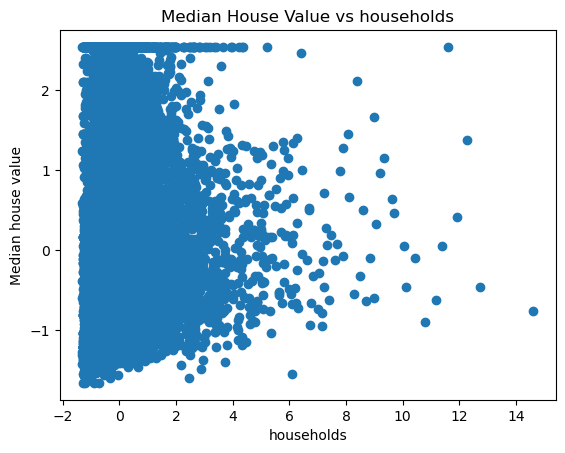

Column: median_income
Intercept: -0.0007275396393187166
Coefficient: [0.69038011]
RMSE: 0.7297595475977818
R2: 0.45885918903846645


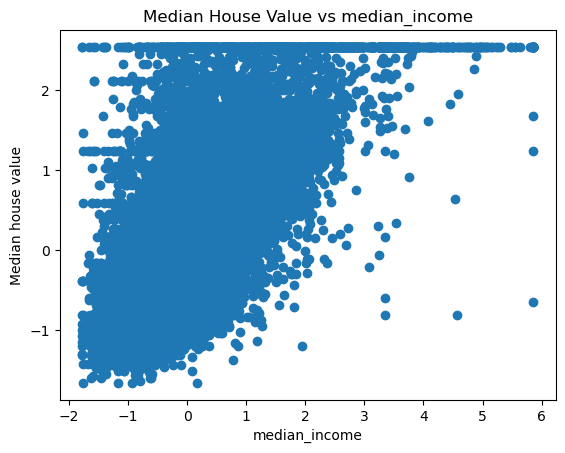

Column: ocean_proximity
Intercept: 0.002496214308923702
Coefficient: [-0.39458727]
RMSE: 0.9052601144909198
R2: 0.1672828893557312


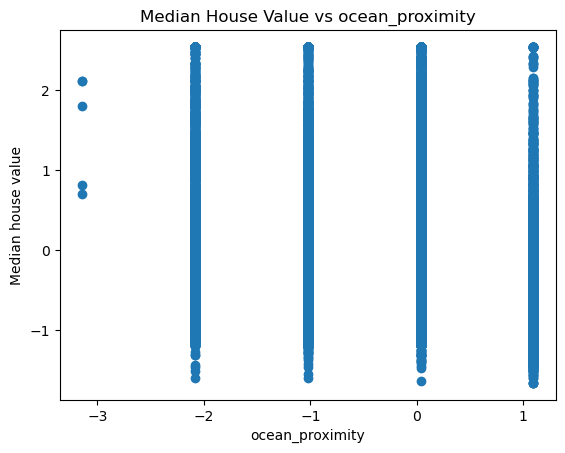

In [62]:
file="/Users/marieqi/Downloads/housingUnits.csv"
data=pd.read_csv(file)
data["total_rooms"]=data['total_rooms']/data['population']
data['total_bedrooms']=data['total_bedrooms']/data['population']
scaler=StandardScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns=data.columns)
y=data['median_house_value']
for column in data.columns:
    if column!='median_house_value':
        X=scaler.fit_transform(data[[column]])
        x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression().fit(x_train,y_train)
        y_pred=model.predict(x_test)
        b0_1, b1_1 = model.intercept_, model.coef_
        rmse=np.sqrt(mean_squared_error(y_test,y_pred))
        r2_test = model.score(x_test, y_test)
        print("Column:", column)
        print("Intercept:", b0_1)
        print("Coefficient:", b1_1)
        print("RMSE:", rmse)
        print("R2:",r2_test)
        plt.scatter(data[[column]],data['median_house_value'])    
        plt.xlabel(f"{column}")
        plt.ylabel('Median house value')
        plt.title("Median House Value vs "+f"{column}")
        plt.show()


Intercept: -0.0007321227737460724
Coefficient: [ 0.14601899  0.0299573   0.02125668 -0.33662599  0.41033989  0.65789592
 -0.22773975]
RMSE: 0.6341105101492961
R2: 0.5914166923864894


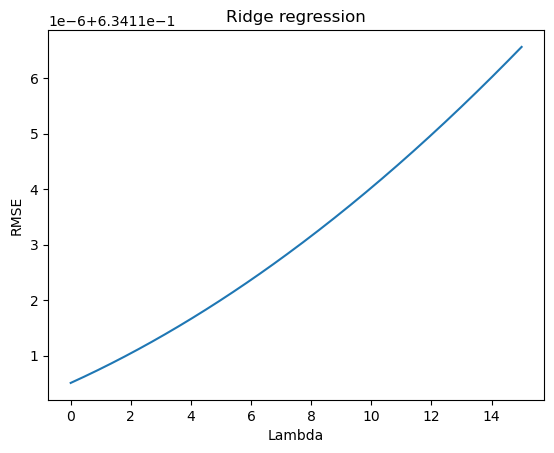

Optimal lambda: 0.001


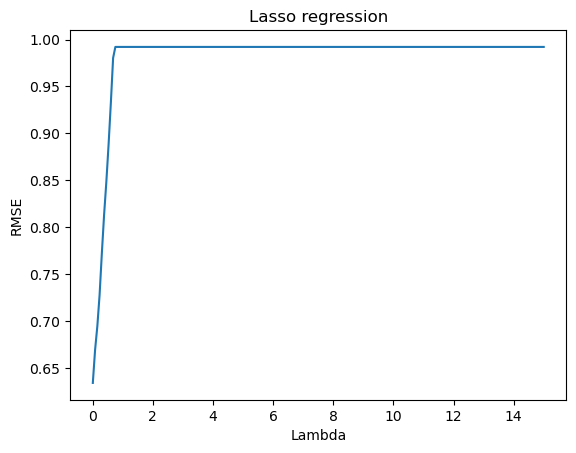

Optimal lambda: 0.001
                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.603
Model:                            OLS   Adj. R-squared (uncentered):              0.603
Method:                 Least Squares   F-statistic:                              3579.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):                        0.00
Time:                        15:05:02   Log-Likelihood:                         -15838.
No. Observations:               16512   AIC:                                  3.169e+04
Df Residuals:                   16505   BIC:                                  3.174e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------

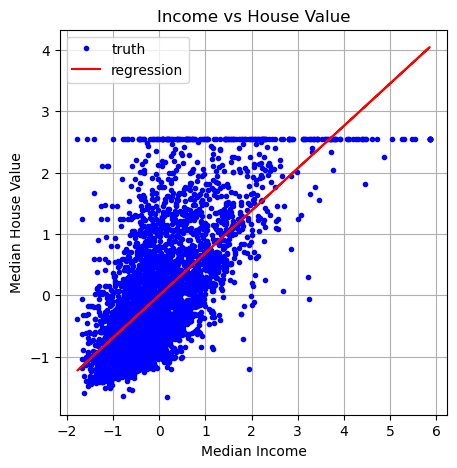

Intercept: [-0.00072754]
Coefficient: [[0.69038011]]
RMSE: 0.7297595475977818
R2: 0.45885918903846645


In [69]:
Xv=data.drop('median_house_value',axis=1)
x_Train,x_Test,y_Train,y_Test=train_test_split(Xv, y, test_size=0.2, random_state=42)
model=sm.OLS(y_Train,x_Train)
result=model.fit()
mode = LinearRegression().fit(x_Train,y_Train)
y_pred=mode.predict(x_Test)
b0_1, b1_1 = mode.intercept_, mode.coef_
rmse=np.sqrt(mean_squared_error(y_Test,y_pred))
r2_test = mode.score(x_Test, y_Test)
print("Intercept:", b0_1)
print("Coefficient:", b1_1)
print("RMSE:", rmse)
print("R2:",r2_test)
#code from lab_2.ipynb
lambdas = np.linspace(0.001,15,201)
cont = np.empty([len(lambdas),2])*np.NaN 
for ii in range(len(lambdas)):
    ridgeModel = Ridge(alpha=lambdas[ii]).fit(x_Train, y_Train)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(y_Test,ridgeModel.predict(x_Test),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Ridge regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])
for ii in range(len(lambdas)):
    ridgeModel = Lasso(alpha=lambdas[ii]).fit(x_Train, y_Train)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(y_Test,ridgeModel.predict(x_Test),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Lasso regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])

print(result.summary())
P=data['median_income'].values.reshape(-1, 1)
R=data['median_house_value'].values.reshape(-1,1)
p_Train,p_Test,r_Train,r_Test=train_test_split(P, R, test_size=0.2, random_state=42)
model = LinearRegression().fit(p_Train,r_Train)
r_Pr=model.predict(p_Test)
bee, be = model.intercept_, model.coef_
rm=np.sqrt(mean_squared_error(r_Test,r_Pr))
r2_test = model.score(p_Test, r_Test)
plt.figure(figsize = (5,5))
plt.plot(p_Test, r_Test, 'b.',label = 'truth')
plt.plot(p_Test, be*(p_Test) + bee, 'r',label = 'regression')
plt.legend()
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Income vs House Value')
plt.grid()
plt.show()

print("Intercept:", bee)
print("Coefficient:", be)
print("RMSE:", rm)
print("R2:",r2_test)

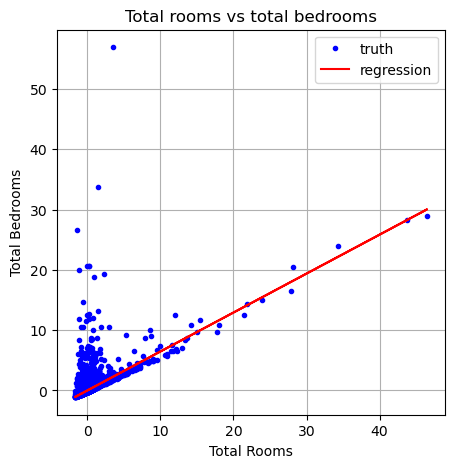

Intercept: [-0.00201387]
Coefficient: [[0.64638783]]
RMSE: 0.7830642420198207
R2: 0.42019580583683735


In [64]:
Xe=data['total_rooms'].values.reshape(-1, 1)
Y=data['total_bedrooms'].values.reshape(-1, 1)
x_Tr,x_Te,y_Tr,y_Te=train_test_split(Xe, Y, test_size=0.2, random_state=42)
model = LinearRegression().fit(x_Tr,y_Tr)
y_Pre=model.predict(x_Te)
b_0, b_1 = model.intercept_, model.coef_
rmserr=np.sqrt(mean_squared_error(y_Te,y_Pre))
r2_test = model.score(x_Te, y_Te)
plt.figure(figsize = (5,5))
plt.plot(Xe, Y, 'b.',label = 'truth')
plt.plot(x_Te, b_1*(x_Te) + b_0, 'r',label = 'regression')
plt.xlabel('Total Rooms')
plt.ylabel('Total Bedrooms')
plt.title('Total rooms vs total bedrooms')
plt.legend()
plt.grid()
plt.show()
print("Intercept:", b_0)
print("Coefficient:", b_1)
print("RMSE:", rmserr)
print("R2:",r2_test)

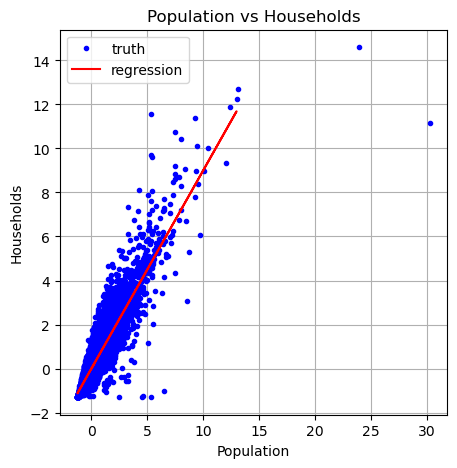

Intercept: [0.00039343]
Coefficient: [[0.90056608]]
RMSE: 0.4287953435910919
R2: 0.8212233477451244


In [63]:
Xi=data['population'].values.reshape(-1, 1)
Yi=data['households'].values.reshape(-1, 1)
x_T,x_Tes,y_T,y_Tes=train_test_split(Xi, Yi, test_size=0.2, random_state=42)
model = LinearRegression().fit(x_T,y_T)
y_Pr=model.predict(x_Tes)
b__0, b__1 = model.intercept_, model.coef_
rmser=np.sqrt(mean_squared_error(y_Tes,y_Pr))
r2_test = model.score(x_Tes, y_Tes)
plt.figure(figsize = (5,5))
plt.plot(Xi, Yi, 'b.',label = 'truth')
plt.plot(x_Tes, b__1*(x_Tes) + b__0, 'r',label = 'regression')
plt.xlabel('Population')
plt.ylabel('Households')
plt.title('Population vs Households')
plt.legend()
plt.grid()
plt.show()
print("Intercept:", b__0)
print("Coefficient:", b__1)
print("RMSE:", rmser)
print("R2:",r2_test)